In [1]:
%%time
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, LocallyConnected2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import applications, regularizers, optimizers
#from keras.callbacks import EarlyStopping, ModelCheckpoint
#from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = 'D:\\frame_baseline_dataset\\train'
validation_dir = 'D:\\frame_baseline_dataset\\validation'
test_dir = 'D:\\frame_baseline_dataset\\test'

train_generator = train_datagen.flow_from_directory(
        directory = train_dir,
        target_size=(152, 152),
        batch_size=32,
        class_mode='categorical',
        shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
        directory = validation_dir,
        target_size=(152, 152),
        batch_size=32,
        class_mode='categorical',
        shuffle=True)

test_generator = test_datagen.flow_from_directory(
        directory = test_dir,
        target_size=(152, 152),
        batch_size=32,
        class_mode='categorical',
        shuffle=True)

Found 35093 images belonging to 160 classes.
Found 8924 images belonging to 160 classes.
Found 3144 images belonging to 160 classes.
Wall time: 3.76 s


Baseline Model

In [3]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(152, 152, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(160, activation='softmax'))
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['acc'])
history = model.fit(train_generator, 
                    steps_per_epoch=10, 
                    epochs=20, 
                    validation_data=validation_generator)

Epoch 1/20
10/10 [==============================] - 174s 18s/step - loss: 13.7550 - acc: 0.0956 - val_loss: 8.7873 - val_acc: 0.2500
Epoch 2/20
10/10 [==============================] - 26s 3s/step - loss: 6.4777 - acc: 0.4295 - val_loss: 2.7930 - val_acc: 0.5830
Epoch 3/20
10/10 [==============================] - 21s 2s/step - loss: 2.2261 - acc: 0.6455 - val_loss: 1.8307 - val_acc: 0.7129
Epoch 4/20
10/10 [==============================] - 22s 2s/step - loss: 1.3553 - acc: 0.8175 - val_loss: 1.3628 - val_acc: 0.7900
Epoch 5/20
10/10 [==============================] - 22s 2s/step - loss: 0.9565 - acc: 0.8553 - val_loss: 0.9933 - val_acc: 0.8486
Epoch 6/20
10/10 [==============================] - 22s 2s/step - loss: 0.6115 - acc: 0.9199 - val_loss: 0.7207 - val_acc: 0.8878
Epoch 7/20
10/10 [==============================] - 23s 2s/step - loss: 0.5045 - acc: 0.9204 - val_loss: 0.5506 - val_acc: 0.9183
Epoch 8/20
10/10 [==============================] - 21s 2s/step - loss: 0.3108 - acc: 0

In [4]:
model.evaluate(test_generator)

99/99 [==============================] - 18s 182ms/step - loss: 0.0866 - acc: 0.9860


[0.08661671727895737, 0.9860050678253174]

In [5]:
history.history

{'loss': [14.32179069519043,
  4.590353488922119,
  1.9782469272613525,
  1.2887282371520996,
  0.91046142578125,
  0.6817697882652283,
  0.45335134863853455,
  0.2825547456741333,
  0.22665366530418396,
  0.13553737103939056,
  0.18278606235980988,
  0.1395702064037323,
  0.1041591614484787,
  0.12290407717227936,
  0.02047988772392273,
  0.05079575628042221,
  0.060570813715457916,
  0.013276641257107258,
  0.0245215967297554,
  0.004302549175918102],
 'acc': [0.14374999701976776,
  0.484375,
  0.6937500238418579,
  0.840624988079071,
  0.8687499761581421,
  0.9125000238418579,
  0.9375,
  0.9593750238418579,
  0.96875,
  0.984375,
  0.981249988079071,
  0.981249988079071,
  0.987500011920929,
  0.987500011920929,
  0.996874988079071,
  0.9937499761581421,
  0.996874988079071,
  1.0,
  0.987500011920929,
  1.0],
 'val_loss': [8.787297248840332,
  2.793011426925659,
  1.830733299255371,
  1.3628343343734741,
  0.9932667016983032,
  0.720747709274292,
  0.5505954623222351,
  0.43200838

In [2]:
from matplotlib import pyplot as plt
def printacc(history):
    loss = history.history['loss']
    epochs = range(1, len(loss) + 1)
    accuracy = history.history['acc']
    val_accuracy = history.history['val_acc']
    plt.plot(epochs, accuracy, 'r', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel("Epochs")
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

def printloss(history):
    loss = history.history['loss']
    epochs = range(1, len(loss) + 1)
    val_loss = history.history['val_loss']
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel("Epochs")
    plt.ylabel('loss')
    plt.legend()
    plt.show()

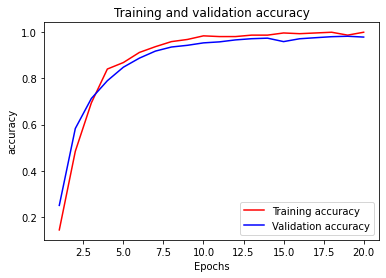

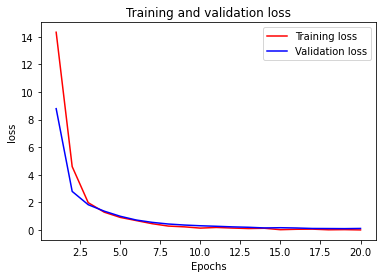

In [7]:
printacc(history)
printloss(history)

Frame Base Model

In [3]:
fbmodel = Sequential()
fbmodel.add(Conv2D(32, (3, 3), activation='relu', input_shape = (152, 152, 3)))
fbmodel.add(MaxPooling2D(pool_size=(2, 2)))
fbmodel.add(Conv2D(16, (3, 3), activation='relu'))
fbmodel.add(Flatten())
fbmodel.add(Dense(1024, activation='relu'))
fbmodel.add(Dense(160, activation='softmax'))
fbmodel.compile(loss='categorical_crossentropy', 
                optimizer=optimizers.Adam(learning_rate=2e-5), 
                metrics=['acc'])
fb_history = fbmodel.fit(train_generator, 
                    steps_per_epoch=20, 
                    epochs=20, 
                    validation_data=validation_generator)

Epoch 1/20
20/20 [==============================] - 37s 1s/step - loss: 4.9018 - acc: 0.0906 - val_loss: 4.3804 - val_acc: 0.1895
Epoch 2/20
20/20 [==============================] - 25s 1s/step - loss: 4.2106 - acc: 0.2317 - val_loss: 3.7303 - val_acc: 0.3613
Epoch 3/20
20/20 [==============================] - 25s 1s/step - loss: 3.4247 - acc: 0.4242 - val_loss: 3.0988 - val_acc: 0.4562
Epoch 4/20
20/20 [==============================] - 25s 1s/step - loss: 2.8544 - acc: 0.5349 - val_loss: 2.5793 - val_acc: 0.5865
Epoch 5/20
20/20 [==============================] - 25s 1s/step - loss: 2.3580 - acc: 0.6330 - val_loss: 2.1474 - val_acc: 0.6313
Epoch 6/20
20/20 [==============================] - 23s 1s/step - loss: 1.9922 - acc: 0.7008 - val_loss: 1.7954 - val_acc: 0.7146
Epoch 7/20
20/20 [==============================] - 24s 1s/step - loss: 1.8649 - acc: 0.6918 - val_loss: 1.5373 - val_acc: 0.7452
Epoch 8/20
20/20 [==============================] - 24s 1s/step - loss: 1.3947 - acc: 0.78

In [4]:
fbmodel.evaluate(test_generator)

99/99 [==============================] - 6s 59ms/step - loss: 0.6357 - acc: 0.9078


[0.6356920003890991, 0.9077607989311218]

In [5]:
fb_history.history

{'loss': [4.746026992797852,
  4.019616603851318,
  3.3742594718933105,
  2.7998762130737305,
  2.3263041973114014,
  1.945184350013733,
  1.695601224899292,
  1.2966493368148804,
  1.007314682006836,
  0.9061160087585449,
  0.7118042707443237,
  0.6475775241851807,
  0.554118275642395,
  0.37107595801353455,
  0.3428993821144104,
  0.28263336420059204,
  0.2676079571247101,
  0.19904561340808868,
  0.2115311175584793,
  0.14793851971626282],
 'acc': [0.1328125,
  0.2671875059604645,
  0.41874998807907104,
  0.5406249761581421,
  0.6312500238418579,
  0.707812488079071,
  0.731249988079071,
  0.8031250238418579,
  0.8515625,
  0.8656250238418579,
  0.893750011920929,
  0.895312488079071,
  0.9296875,
  0.9671875238418579,
  0.949999988079071,
  0.9703124761581421,
  0.9609375,
  0.9765625,
  0.971875011920929,
  0.9781249761581421],
 'val_loss': [4.380406379699707,
  3.7303264141082764,
  3.098825454711914,
  2.5792739391326904,
  2.1473653316497803,
  1.795364499092102,
  1.5372871160

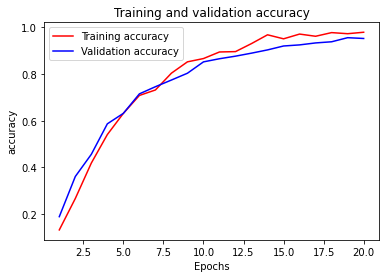

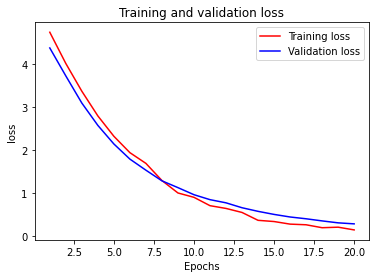

In [6]:
printacc(fb_history)
printloss(fb_history)

Aligned Base Model

In [7]:
%%time
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = 'D:\\aligned_baseline_dataset\\train'
validation_dir = 'D:\\aligned_baseline_dataset\\validation'
test_dir = 'D:\\aligned_baseline_dataset\\test'

train_generator = train_datagen.flow_from_directory(
        directory = train_dir,
        target_size=(152, 152),
        batch_size=32,
        class_mode='categorical',
        shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
        directory = validation_dir,
        target_size=(152, 152),
        batch_size=32,
        class_mode='categorical',
        shuffle=True)

test_generator = test_datagen.flow_from_directory(
        directory = test_dir,
        target_size=(152, 152),
        batch_size=32,
        class_mode='categorical',
        shuffle=True)

Found 35092 images belonging to 160 classes.
Found 8925 images belonging to 160 classes.
Found 3144 images belonging to 160 classes.
Wall time: 1.54 s


In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, LocallyConnected2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import applications, regularizers, optimizers
#from keras.callbacks import EarlyStopping, ModelCheckpoint
#from keras.utils import to_categorical

In [9]:
abmodel = Sequential()
abmodel.add(Conv2D(32, (3, 3), activation='relu', input_shape = (152, 152, 3)))
abmodel.add(MaxPooling2D(pool_size=(2, 2)))
abmodel.add(Conv2D(16, (3, 3), activation='relu'))
abmodel.add(Flatten())
abmodel.add(Dense(1024, activation='relu'))
abmodel.add(Dense(160, activation='softmax'))
abmodel.compile(loss='categorical_crossentropy', 
                optimizer=optimizers.Adam(learning_rate=2e-5), 
                metrics=['acc'])
ab_history = abmodel.fit(train_generator, 
                    steps_per_epoch=20, 
                    epochs=20, 
                    validation_data=validation_generator)

Epoch 1/20
20/20 [==============================] - 16s 812ms/step - loss: 4.8841 - acc: 0.0534 - val_loss: 4.4519 - val_acc: 0.1451
Epoch 2/20
20/20 [==============================] - 15s 783ms/step - loss: 4.3623 - acc: 0.1704 - val_loss: 3.9952 - val_acc: 0.2361
Epoch 3/20
20/20 [==============================] - 15s 774ms/step - loss: 3.7935 - acc: 0.2835 - val_loss: 3.5884 - val_acc: 0.3293
Epoch 4/20
20/20 [==============================] - 15s 765ms/step - loss: 3.3310 - acc: 0.3840 - val_loss: 3.1958 - val_acc: 0.4227
Epoch 5/20
20/20 [==============================] - 15s 765ms/step - loss: 2.8618 - acc: 0.4898 - val_loss: 2.9264 - val_acc: 0.4517
Epoch 6/20
20/20 [==============================] - 15s 765ms/step - loss: 2.7610 - acc: 0.4809 - val_loss: 2.6005 - val_acc: 0.5180
Epoch 7/20
20/20 [==============================] - 15s 778ms/step - loss: 2.3893 - acc: 0.5694 - val_loss: 2.4105 - val_acc: 0.5442
Epoch 8/20
20/20 [==============================] - 15s 767ms/step - 

In [10]:
abmodel.evaluate(test_generator)

99/99 [==============================] - 4s 44ms/step - loss: 1.8023 - acc: 0.6492


[1.8022775650024414, 0.6491730213165283]

In [11]:
ab_history.history

{'loss': [4.743236064910889,
  4.2485456466674805,
  3.6415698528289795,
  3.2781035900115967,
  2.9390406608581543,
  2.754173755645752,
  2.3170101642608643,
  2.1003992557525635,
  1.9525063037872314,
  1.667236566543579,
  1.6381309032440186,
  1.3623675107955933,
  1.2731938362121582,
  1.1390103101730347,
  1.098801851272583,
  1.1142034530639648,
  0.8860601186752319,
  0.8396075367927551,
  0.7534114122390747,
  0.7664423584938049],
 'acc': [0.07656250149011612,
  0.19374999403953552,
  0.3218750059604645,
  0.38593751192092896,
  0.46562498807907104,
  0.4906249940395355,
  0.589062511920929,
  0.6265624761581421,
  0.640625,
  0.6796875,
  0.6890624761581421,
  0.7640625238418579,
  0.768750011920929,
  0.8140624761581421,
  0.7953125238418579,
  0.8031250238418579,
  0.840624988079071,
  0.8500000238418579,
  0.862500011920929,
  0.8609374761581421],
 'val_loss': [4.451865196228027,
  3.9952244758605957,
  3.588425397872925,
  3.195784091949463,
  2.9264373779296875,
  2.600

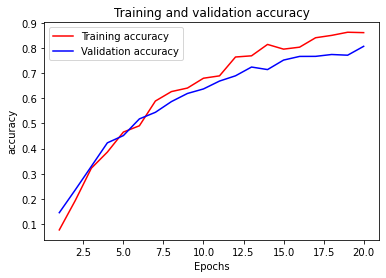

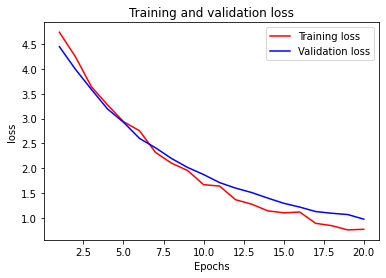

In [12]:
printacc(ab_history)
printloss(ab_history)

VGG16 Base Model

In [28]:
from keras.applications.vgg16 import VGG16

conv_base = VGG16(weights='imagenet', 
                  include_top=False, 
                  input_shape=(152, 152, 3))
conv_base.trainable = False
#conv_base.summary()
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block3_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

vabmodel = Sequential()
vabmodel.add(conv_base)
vabmodel.add(Flatten())
vabmodel.add(Dense(4096, activation = 'relu'))
vabmodel.add(Dense(160, activation = 'softmax'))
vabmodel.compile(loss='categorical_crossentropy', 
                optimizer=optimizers.Adam(learning_rate=2e-5), 
                metrics=['acc'])
vab_history = vabmodel.fit(train_generator, 
                    steps_per_epoch=20, 
                    epochs=30, 
                    validation_data=validation_generator)

Epoch 1/30
20/20 [==============================] - 36s 2s/step - loss: 5.0768 - acc: 0.0358 - val_loss: 4.3586 - val_acc: 0.1325
Epoch 2/30
20/20 [==============================] - 31s 2s/step - loss: 4.0787 - acc: 0.1820 - val_loss: 3.7500 - val_acc: 0.3128
Epoch 3/30
20/20 [==============================] - 30s 2s/step - loss: 3.5322 - acc: 0.3925 - val_loss: 3.2827 - val_acc: 0.4275
Epoch 4/30
20/20 [==============================] - 29s 2s/step - loss: 3.2645 - acc: 0.4206 - val_loss: 2.9104 - val_acc: 0.4815
Epoch 5/30
20/20 [==============================] - 29s 1s/step - loss: 2.6254 - acc: 0.5786 - val_loss: 2.5837 - val_acc: 0.5975
Epoch 6/30
20/20 [==============================] - 28s 1s/step - loss: 2.3307 - acc: 0.6443 - val_loss: 2.3266 - val_acc: 0.6372
Epoch 7/30
20/20 [==============================] - 29s 1s/step - loss: 2.1615 - acc: 0.6711 - val_loss: 2.0893 - val_acc: 0.6931
Epoch 8/30
20/20 [==============================] - 29s 1s/step - loss: 1.8592 - acc: 0.73

In [29]:
vabmodel.evaluate(test_generator)

99/99 [==============================] - 9s 91ms/step - loss: 0.9026 - acc: 0.8960


[0.9025611877441406, 0.8959923386573792]

In [30]:
vab_history.history

{'loss': [4.866844177246094,
  3.9409196376800537,
  3.41802716255188,
  3.0326192378997803,
  2.593425750732422,
  2.3105804920196533,
  2.156674861907959,
  1.8587582111358643,
  1.6593376398086548,
  1.5405809879302979,
  1.3600733280181885,
  1.1894994974136353,
  0.9729093313217163,
  0.9409619569778442,
  0.8204247355461121,
  0.7615445256233215,
  0.7163923978805542,
  0.5769508481025696,
  0.5366227030754089,
  0.5660051107406616,
  0.4843103289604187,
  0.3854382634162903,
  0.35309451818466187,
  0.39178940653800964,
  0.33283519744873047,
  0.3290623724460602,
  0.31533581018447876,
  0.3098258376121521,
  0.2536119818687439,
  0.240268737077713],
 'acc': [0.05937499925494194,
  0.2229299396276474,
  0.4281249940395355,
  0.4593749940395355,
  0.574999988079071,
  0.653124988079071,
  0.676562488079071,
  0.731249988079071,
  0.760937511920929,
  0.7984374761581421,
  0.8500000238418579,
  0.8734375238418579,
  0.895312488079071,
  0.910937488079071,
  0.917187511920929,
  0

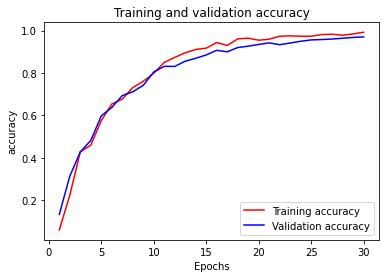

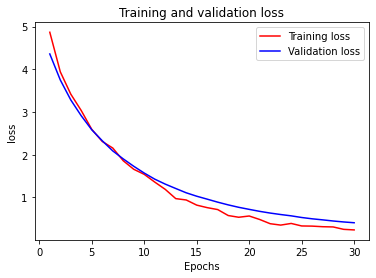

In [31]:
printacc(vab_history)
printloss(vab_history)

InceptionResNetV2 Base Model

In [32]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2

conv_base = InceptionResNetV2(weights='imagenet', 
                  include_top=False, 
                  input_shape=(152, 152, 3))
conv_base.trainable = False
#conv_base.summary()
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block3_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

iabmodel = Sequential()
iabmodel.add(conv_base)
iabmodel.add(Flatten())
iabmodel.add(Dense(4096, activation = 'relu'))
iabmodel.add(Dense(160, activation = 'softmax'))
iabmodel.compile(loss='categorical_crossentropy', 
                optimizer=optimizers.Adam(learning_rate=2e-5), 
                metrics=['acc'])
iab_history = iabmodel.fit(train_generator, 
                    steps_per_epoch=20, 
                    epochs=30, 
                    validation_data=validation_generator)

Epoch 1/30
20/20 [==============================] - 80s 2s/step - loss: 5.0987 - acc: 0.1687 - val_loss: 3.1197 - val_acc: 0.4608
Epoch 2/30
20/20 [==============================] - 30s 2s/step - loss: 2.3778 - acc: 0.5456 - val_loss: 2.0932 - val_acc: 0.6012
Epoch 3/30
20/20 [==============================] - 29s 2s/step - loss: 1.6460 - acc: 0.6923 - val_loss: 1.4827 - val_acc: 0.7191
Epoch 4/30
20/20 [==============================] - 29s 2s/step - loss: 1.0746 - acc: 0.7977 - val_loss: 1.1404 - val_acc: 0.7826
Epoch 5/30
20/20 [==============================] - 30s 2s/step - loss: 0.7926 - acc: 0.8571 - val_loss: 0.9186 - val_acc: 0.8235
Epoch 6/30
20/20 [==============================] - 30s 2s/step - loss: 0.6571 - acc: 0.8865 - val_loss: 0.7354 - val_acc: 0.8537
Epoch 7/30
20/20 [==============================] - 29s 2s/step - loss: 0.4133 - acc: 0.9185 - val_loss: 0.6406 - val_acc: 0.8790
Epoch 8/30
20/20 [==============================] - 29s 1s/step - loss: 0.3313 - acc: 0.94

In [33]:
iabmodel.evaluate(test_generator)

99/99 [==============================] - 10s 99ms/step - loss: 0.2992 - acc: 0.9396


[0.2991562783718109, 0.9395674467086792]

In [34]:
iab_history.history

{'loss': [4.256155967712402,
  2.183821439743042,
  1.5739428997039795,
  1.0360331535339355,
  0.8196795582771301,
  0.5770542025566101,
  0.4374513626098633,
  0.37280207872390747,
  0.30224114656448364,
  0.20910696685314178,
  0.2053299844264984,
  0.1286807656288147,
  0.14563950896263123,
  0.1029796227812767,
  0.10074583441019058,
  0.07045720517635345,
  0.0605606846511364,
  0.062437377870082855,
  0.05023146793246269,
  0.05100027471780777,
  0.06294067203998566,
  0.040016964077949524,
  0.0316859632730484,
  0.03198130056262016,
  0.041701920330524445,
  0.04988238960504532,
  0.022990092635154724,
  0.02772693894803524,
  0.01623176969587803,
  0.02356776036322117],
 'acc': [0.29374998807907104,
  0.578125,
  0.715624988079071,
  0.809374988079071,
  0.8453124761581421,
  0.903124988079071,
  0.917187511920929,
  0.9375,
  0.9515625238418579,
  0.971875011920929,
  0.9671875238418579,
  0.9828125238418579,
  0.9781249761581421,
  0.989062488079071,
  0.987500011920929,
  

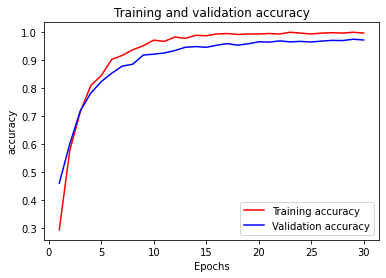

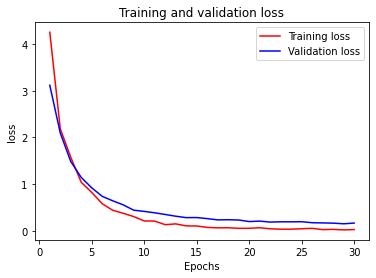

In [35]:
printacc(iab_history)
printloss(iab_history)